make some squrae synthetic friges using Airy formulae  
save to disk along with a fake input file for practice with software.



In [2]:
from pathlib import Path


import random
from PIL import Image, ImageFilter
import numpy as np

import matplotlib.pyplot as plt
import matplotlib


from ls_fringeapp import fringeprocess as fp
from ls_fringeapp.load_equipment_data import repo_folder
from ls_fringeapp import plot_helpers as ph
from ls_fringeapp import synthetic_images as si
from ls_fringeapp.file_formats import DTRG, DTRG_OUTPUT

In [3]:
save_path = repo_folder / "tests" / "data" / "mock_square_gauges"
dest = save_path / "mock_input_file.txt"
save_path

PosixPath('/home/elfnor/gits/ls-fringeapp/tests/data/mock_square_gauges')

In [ ]:
# use the input contol file from Platen03 create some new files with same fringe fractions
txt_name = (
    repo_folder
    / "tests"
    / "data"
    / "Platen03"
    / "cropped"
    / "python_input_file_bare.txt"
)
# copy file to save_path

dest.write_text(txt_name.read_text())


In [4]:
# read the output file to get the fringe fractions
output_fn = (
    repo_folder / "tests" / "data" / "Platen03" / "cropped" / "output-calcs-py.txt"
)
gauge_calcs = np.loadtxt(output_fn, delimiter=",", dtype=DTRG_OUTPUT)
gauge_calcs

array([(12.9, ' "na"',  34.7, -7.1,  31.2,  38.3,  5, 45735.706065, 45735.706713, ' "MSL"', 3, 2, 9.5e-06, ' "Metric"', 19.958742, 19.956081, 19.925719, 19.92456 , 1017.343, 1017.363, 54.02, 54.02,  3.  , 25.59, 632.99121258, 532.24557645, 1.00027248, 1.00027413, ' "MSL-03_01-R.bmp"', ' "MSL-03_01-G.bmp"'),
       (15. , ' "na"', -26.7, 10.1, -21.6, -31.7, 10, 45735.707894, 45735.707292, ' "MSL"', 3, 2, 9.5e-06, ' "Metric"', 19.956403, 19.956081, 19.92456 , 19.92456 , 1017.383, 1017.373, 54.02, 54.02, 82.88, 24.42, 632.99121258, 532.24557645, 1.00027249, 1.00027415, ' "MSL-03_02-R.bmp"', ' "MSL-03_02-G.bmp"'),
       (17.6, ' "na"',  73.1, -4.7,  70.8,  75.5,  5, 45735.708681, 45735.712384, ' "MSL"', 3, 2, 9.5e-06, ' "Metric"', 19.956403, 19.960902, 19.923777, 19.926716, 1017.393, 1017.503, 54.02, 54.02, 31.6 , 24.46, 632.99121258, 532.24557645, 1.00027249, 1.00027414, ' "MSL-03_03-R.bmp"', ' "MSL-03_03-G.bmp"'),
       (20.2, ' "na"',  48.6, -2.8,  47.2,  50. ,  5, 45735.713611, 45735

In [ ]:
# make one image
ffrac_set = gauge_calcs["ffred"][0] / 100
print(ffrac_set)
a1, gb_yx = si.synthetic_image_with_gauge(
    111,
    0,
    ffrac_set,
    (800, 800),
    (600, 600),
)
a2 = si.blur_gauge_hole(a1, gb_yx)


0.03


(np.float64(-0.5), np.float64(799.5), np.float64(799.5), np.float64(-0.5))

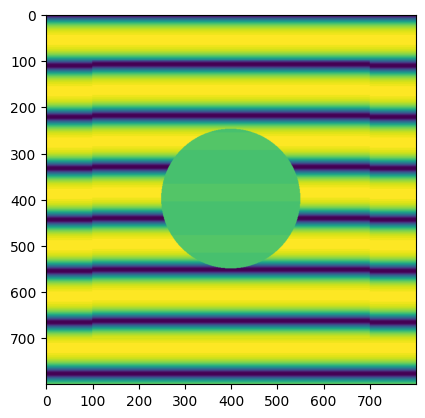

In [11]:
plt.imshow(a2)
plt.axis("image")


In [ ]:
out_fn = save_path / gauge_calcs["RedFileName"][0].replace('"', "").strip()
out_fn

PosixPath('/home/elfnor/gits/ls-fringeapp/tests/data/mock_square_gauges/MSL-03_01-R.bmp')

In [33]:
# save image
img = Image.fromarray(a2)
img.save(out_fn)


In [ ]:
# make one image
ffrac_set = 0.25
a1, gb_yx = si.synthetic_image_with_gauge(
    111,
    0,
    ffrac_set,
    (800, 800),
    (600, 600),
)
ffrac_calc1 = fp.array2frac(a1, gb_yx, drawinfo=False)
a2 = si.blur_gauge_hole(a1, gb_yx)
ffrac_calc2, drawdata = fp.array2frac(
    a2,
    gb_yx,
    drawinfo=True,
    circle_radius=0.26,
    border=(0.1, 0.1),
)
ffrac_set, ffrac_calc1, ffrac_calc2

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi=80)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_title(f"{ffrac_set=:.4f}, {ffrac_calc2=:.4f}")
ph.draw_gauge(ax, a2, drawdata)

In [ ]:
# loop through random trials
n_tests = 50
ffracs2 = []
margin = 0.01

for i in range(n_tests):
    ffrac_set = random.uniform(0.0 + margin, 1.0 - margin)
    spacing = random.uniform(80, 120)
    offset = random.uniform(0, spacing)
    img_size = (int(random.uniform(750, 850)), int(random.uniform(750, 850)))
    gb_width = int(random.uniform(550, 650))
    gb_size = (gb_width, gb_width)

    a1, gb_yx = si.synthetic_image_with_gauge(
        spacing,
        offset,
        ffrac_set,
        img_size,
        gb_size,
    )
    a2 = si.blur_gauge_hole(a1, gb_yx, circle_radius=0.25)
    ffrac_calc2, drawdata = fp.array2frac(
        a2,
        gb_yx,
        drawinfo=True,
        circle_radius=0.26,
        border=(0.1, 0.1),
    )

    ffracs2.append(
        [
            spacing,
            offset,
            img_size[0],
            img_size[1],
            gb_size[0],
            gb_size[1],
            ffrac_set,
            ffrac_calc2,
        ],
    )

ffracs = np.array(ffracs2)
diff = ffracs[:, -1] - ffracs[:, -2]


In [ ]:
print(f"{diff.shape=}")
print(f"{diff.mean()=}")
print(f"{diff.std(ddof=1)=}")
print(f"{diff.max()=}")
print(f"{diff.min()=}")